# __DFN.lab: extras, properties and attributes__

### Description

Within DFN.lab, objects such as fractures or domains can be characterized through three distinct mechanisms:

- Extras: These are simple tags or labels associated with an object, serving as identifiers or categorical descriptors.
- Attributes: Attributes are derived characteristics of an object, computed using specific Python functions. They may represent quantitative or qualitative features that result from particular computations or analyses.
- Properties: Properties refer to specialized characteristics with predefined names. They are fixed attributes that may correspond to essential physical or geometrical properties of the object.

<center>
<div>
<img src="https://gitlab.com/fractorylab/dfnlab/-/raw/dev/Tutorials/img/illusTutoProp.png" width="800"/>
</div>
<br>
Illustration of extras, properties and attributes on different objects.
</center>


#### Extras

Extras provide a mechanism for users to attach specific information to objects such as fractures, intersections, or domains. These tags, consisting of a name and a numerical value (either float or int), can be used to track essential properties or refine analyses. Although DFN.lab stores and maintains extras, it does not utilize them internally, allowing for flexibility in naming.

#### Attributes

Attributes represent object characteristics that are not stored in memory but can be computed for each object. If numerical, they can be saved in extras for exportation. A comprehensive description of all attributes, including complex structures, is available in the Python API documentation for each object. While primarily numerical, some attributes may encompass more intricate structures.

#### Properties

Properties are specialized information pieces essential for DFN.lab to execute specific processes. These must adhere to fixed naming conventions; otherwise, DFN.lab will disregard them. Main properties typically define mechanical and flow properties, with each process stipulating its unique set. These are usually detailed in the corresponding tutorial. Some functions have been defined for easy access to relevant property values without knowing their names, but overwriting them with proper names is permissible. Properties may be numerical, string, or even complex structures, as required for DFN generation.

### Example:

In this example, we will define a simple Discrete Fracture Network (DFN) and compute the flow within it. We will demonstrate the application of extras, retrieval of specific attributes, and observation of object properties as part of the illustration process.

In [1]:
# import dfnlab modules

import dfnlab.System as sys
import dfnlab.Domains as dom
import dfnlab.Fractures as dfn
import dfnlab.FlowBoundaryConditions as bc
import dfnlab.Mesh as mesh 
import dfnlab.Flow as flow
import dfnlab.MaterialProperties as mat
import numpy as np
import os

Once the required modules are loaded, the associated property names become visible. It is important to note that these names are immutable, and their value types are explicitly defined in the tutorials dedicated to the corresponding processes.

In [2]:
import dfnlab.Core as dco

# Retrieve a dictionary where keys are the object types and values are the possible properties
allpropnames = dco.HasProperties.getAllPropertyNames()

# Print the object types and their corresponding properties
for k in allpropnames:
    print(f"{k} : {[v for v in allpropnames[k]]}")

Domains::DomainMesh : ['generation', 'name']
class Domains::Domain : ['generation']
class Fractures::DFN : ['storativities', 'transmissivities']
class Fractures::Fracture : ['storativity', 'label', 'transmissivity', 'DomainOrigin']
class Meshes::FractureMesh : ['resolutionIntersection', 'hmax', 'resolutionGeometry', 'caracteristicLength', 'hmin', 'gradation', 'TotalArea']
class Meshes::IntersectionMesh : ['resolution']
class Meshes::Mesh : ['resolutionIntersection', 'hmax', 'caracteristicLength', 'hmin', 'gradation']


-------------------------------------

The example from [Tutorial 12](012-Flow_steady.ipynb) serves as the foundation for this illustration. In this context, we will specifically concentrate on the utilization and examination of extras, attributes, and properties.

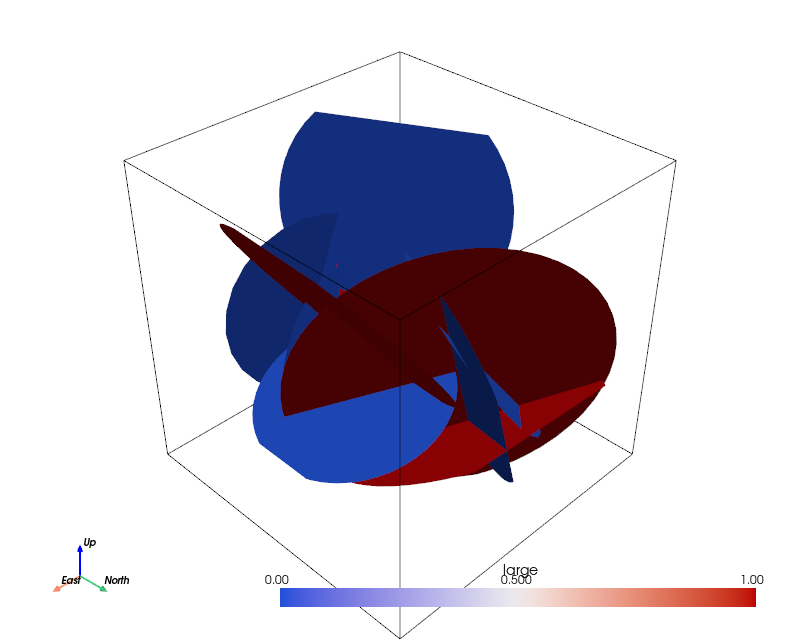

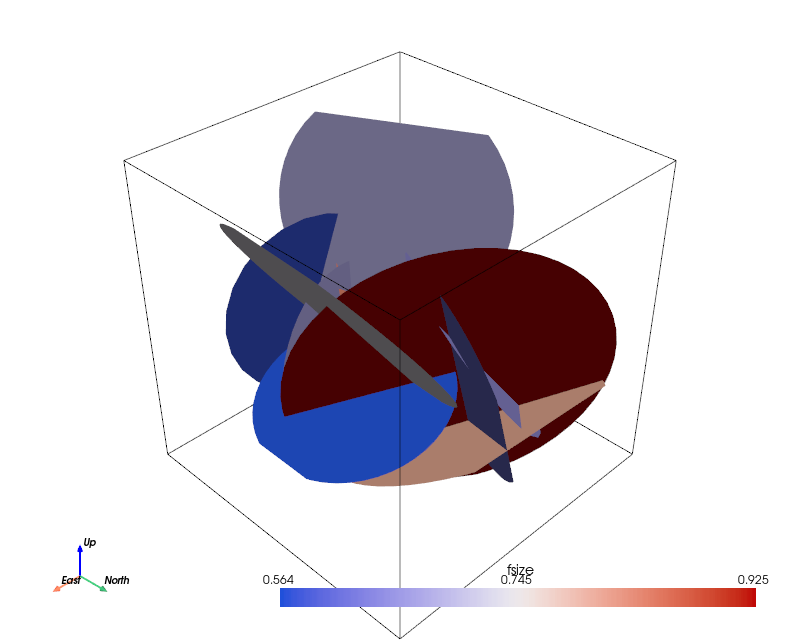

In [3]:
# create the DFN geometry
system = sys.System()
domain = dom.Domain()
domain.buildParallelepiped(center=[0, 0, 0], L1=1.)
system.setDomain(domain)
fnet = dfn.DFN()
system.setDFN(fnet)
dfn.load_disk_file(fnet, filename='sources/Ktest.disk')
system.build()

# Add extras to fractures based on their size
# Fractures larger than 0.75 will be marked with an extra for later focus
# The fracture size will also be saved as another extra for plotting
for f in fnet:
    fsize = f.getDiameter()  # Compute the fracture size
    fnet.setFractureExtra(f, "fsize", fsize)  # Save the size as an extra
    if fsize > 0.75:
        fnet.setFractureExtra(f, "large", 1)  # Mark large fractures
    else:
        fnet.setFractureExtra(f, "large", 0)  # Mark non-large fractures

# Import the plotting function and plot the DFN with the defined extras
from sources.functions import plot_dfn
plot_dfn(system, value="large")
plot_dfn(system, value="fsize")


number of intersections 24
Mesh of characteristic size 1.0


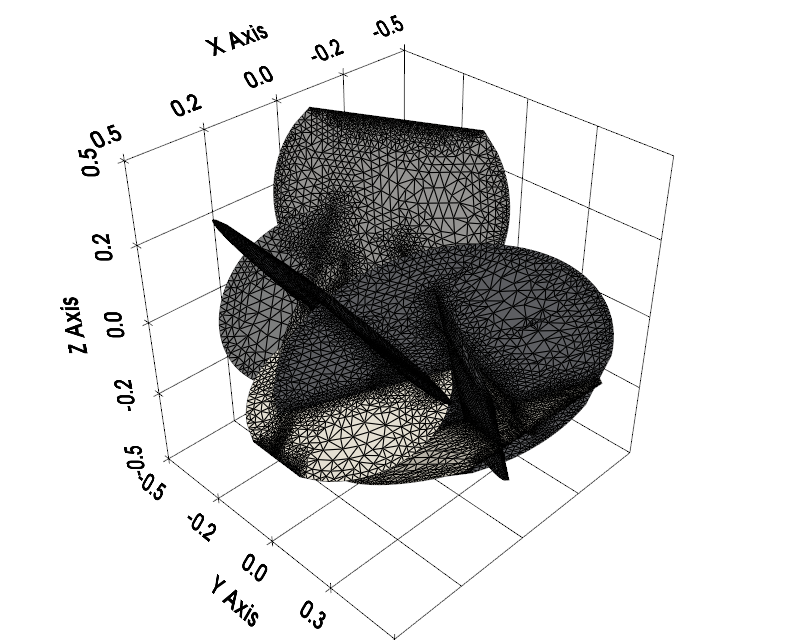

In [4]:
# Mesh the DFN by loading the mesh from a specified source
meshDFN = mesh.Mesh(system)
meshDFN.load("sources/MeshExamples/KTestFine/")

# Retrieve and print the characteristic length of the loaded mesh, which is a property
characteristic_length = meshDFN.getProperties('caracteristicLength').toDouble()
print(f"Mesh of characteristic size {characteristic_length}")

# Import the plotting function and plot the mesh
from sources.functions import plot_mesh
plot_mesh(meshDFN)



Boundary Conditions represent specific properties that can be associated with domains, wells, tunnels, or intersections within the DFN framework. Currently, only "flow" boundary conditions are supported. The possible names for these conditions can be inspected in a manner analogous to properties.

In [5]:
# Set a flow boundary condition using the Permeameter method on the domain
# The direction of flow is defined along the Z-axis, with a delta head of 10
bc.FlowBoundaryCondition.setPermeameter(domain=domain, deltahead=10, direction=np.array([0, 0, 1]))

# Retrieve all boundary condition names for different object types
allBCnames = dco.HasBoundaryCondition.getAllBCNames()

# Print the object types and their corresponding boundary conditions
for k in allBCnames:
    print(f"{k} : {[v for v in allBCnames[k]]}")

Domains::Border : ['flow']
Domains::Tunnel : ['flow']
Domains::Well1D : ['flow']
class Domains::Border : ['flow']


Transmissivities function as "high-level" properties within the DFN framework and are specifically associated with the Discrete Fracture Network (DFN) itself. These properties serve as parameters for underlying "Transmissivity Generator Process".

In [6]:
# Set constant transmissivities for the DFN with a value of 1
mat.Transmissivities.setConstant(dfn=fnet, value=1)

# Retrieve the transmissivities property for the DFN
transmissivities = fnet.getProperties('transmissivities')
print(transmissivities)

# Iterate through the fractures in the DFN and print the transmissivity for each
for f in fnet:
    trans_value = transmissivities.getProperty(f).getValue()
    print(f'transmissivity of fracture {f.getIndex()}: {trans_value}')

transmissivity of fracture 0: 1.0
transmissivity of fracture 1: 1.0
transmissivity of fracture 2: 1.0
transmissivity of fracture 3: 1.0
transmissivity of fracture 4: 1.0
transmissivity of fracture 5: 1.0
transmissivity of fracture 6: 1.0
transmissivity of fracture 7: 1.0
transmissivity of fracture 8: 1.0
transmissivity of fracture 9: 1.0


In [7]:
flow_system = flow.solveDarcyProblem(meshDFN)

solveDarcyProblem
61899
Linear system building 
Application of the boundary conditions
Linear System solving
compute the indicators


For flow analysis within the DFN, quantities such as heads, velocity, and other related quantities are attributes of the flow system:

Number of mesh elements: 61899


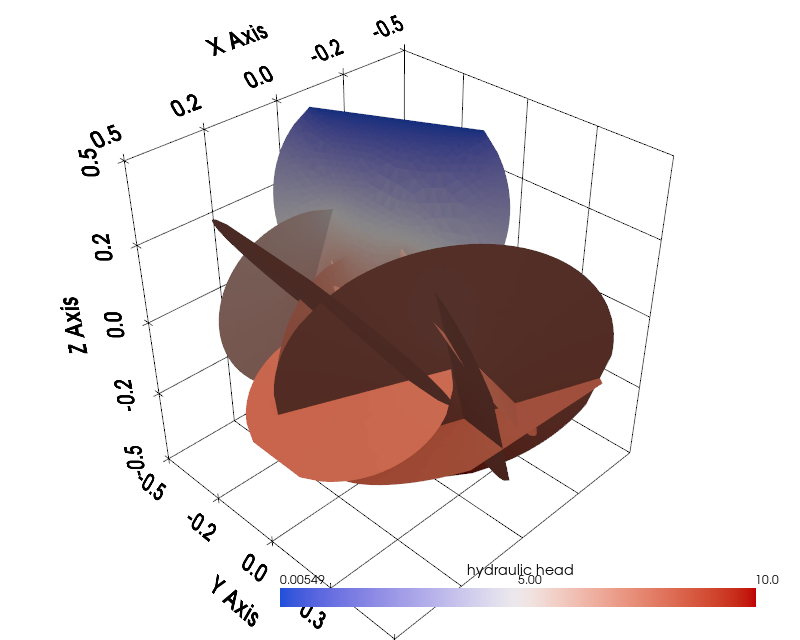

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
# Print the number of mesh elements in the DFN
print("Number of mesh elements: {}".format(meshDFN.numTriangles()))

# Plot the mesh along with the hydraulic head using the flow system's head attribute
plot_mesh(meshDFN, flow_system.getHead(), "hydraulic head")

# Iterate through the fractures in the DFN and print the total flow for fractures marked as "large" (extra "large" = 1)
from IPython.display import display, Math
for f in fnet:
    if f.getExtra("large") > 0:
        ff = flow_system.flowInFracture()  # Retrieve the flow in the fracture
        display(Math(f"\\text{{flow in fracture {f.getIndex()}:}} {ff.getValue(f):.2f} \\, m^3/s"))
